## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns
import itertools
%matplotlib inline

In [2]:
from pandas import read_csv
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

## Load Data

In [3]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pd.read_csv(url, names=names)

In [4]:
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Inspect the dataset

1. Dimensions of the dataset.
2. Peek at the data itself.
3. Statistical summary of all attributes.
4. Breakdown of the data by the class variable.

In [5]:
dataset.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


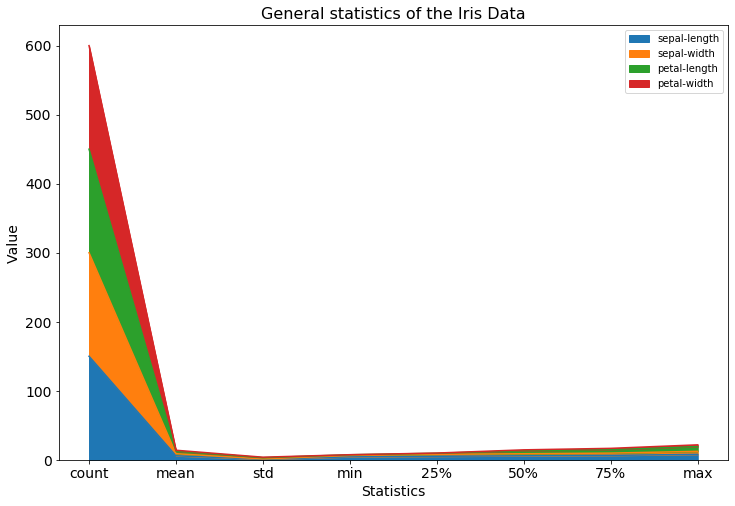

In [6]:
dataset.describe().plot(kind = "area", figsize  = (12,8), fontsize = 14)
plt.xlabel("Statistics",fontsize = 14)
plt.ylabel("Value",fontsize = 14)
plt.title("General statistics of the Iris Data", fontsize = 16)
plt.show()

In [7]:
dataset["class"].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: class, dtype: int64

In [8]:
dataset.shape

(150, 5)

In [9]:
dataset = dataset.astype({"class":"category"})

In [10]:
dataset["class"].dtype

CategoricalDtype(categories=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], ordered=False)

## Visualization

### 1. Box plot

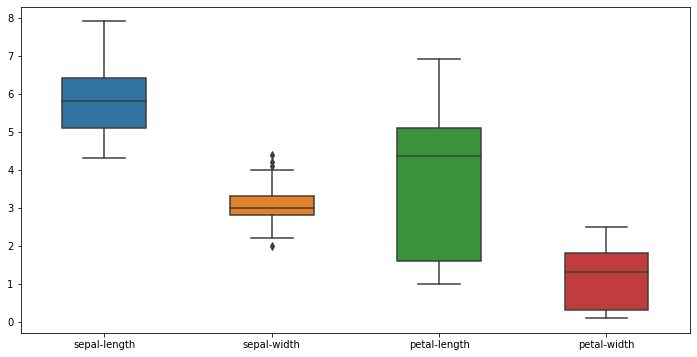

In [11]:
plt.figure(figsize = (12,6))
sns.boxplot(data = dataset.iloc[:,0:4],width = 0.5)
plt.show()

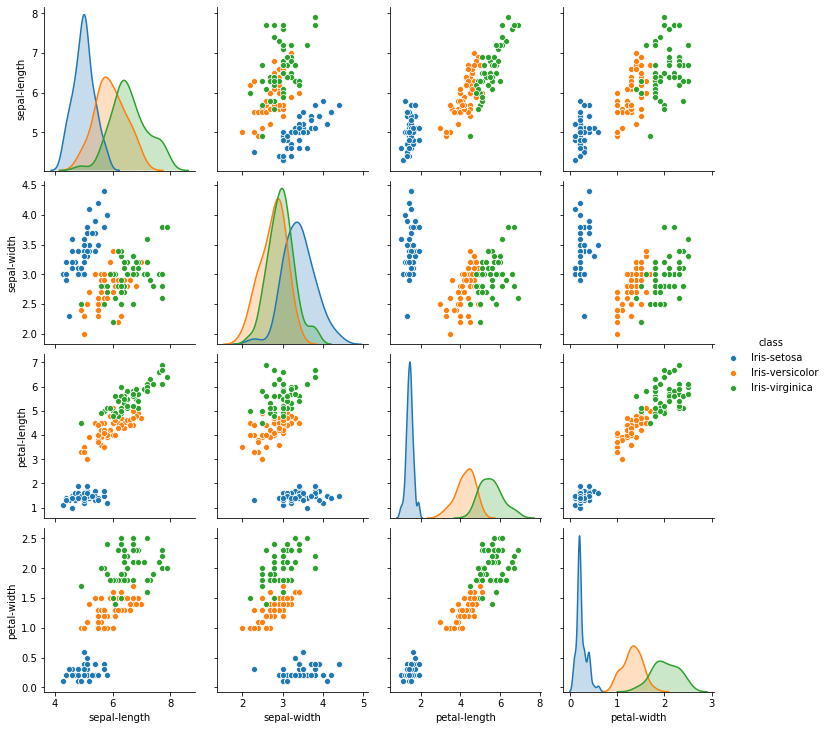

In [17]:
sns.pairplot(dataset, hue = "class")
plt.show()

### ML models
1. K – Nearest Neighbour (KNN)
2. Support Vector Machine (SVM)
3. Logistic Regression

## K – Nearest Neighbour (KNN)

Lets define feature set X.
X is all the columns except "class" since it is the target.
I will use scikit learn library for which i need to convert the pandas dataframe into a numpy array.

In [18]:
dataset.columns

Index(['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class'], dtype='object')

In [19]:
 type(dataset[["sepal-length","sepal-width","petal-length","petal-width"]].values)

numpy.ndarray

In [20]:
X = dataset[["sepal-length","sepal-width","petal-length","petal-width"]].values

In [21]:
X[0:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

Now target Y

In [45]:
Y = dataset["class"].values

### Normalize data

Data Standardization give data zero mean and unit variance, it is good practice, especially for algorithms such as KNN which is based on distance of cases:

In [46]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

In [47]:
X[0:5]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673],
       [-1.02184904,  1.26346019, -1.3412724 , -1.31297673]])

To increase our out of sample accuracy I will use TRain Test split approach. Here, i will divide my dataset into training and testing sets which are mutually exclusive. After that, we will use training set to train the model and testing set for test.
This will increase out of sample accuracy because the testing set is not the part of the training set which is used to train the model.

In [48]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2,random_state = 10)
print("Train set : ", X_train.shape,y_train.shape)
print("Test set : ", X_test.shape,y_test.shape)

Train set :  (120, 4) (120,)
Test set :  (30, 4) (30,)


I am using K = 5 for training the model

In [49]:
k = 5
neigh = KNeighborsClassifier(n_neighbors= k ).fit(X_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

Now prediction

In [50]:
yhat = neigh.predict(X_test)
yhat

array(['Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica'],
      dtype=object)

Accuracy evaluation

In [51]:
print("Accuracy Score: ", metrics.accuracy_score(y_test, yhat))

Accuracy Score:  0.9666666666666667


## Logistic Regression

In [52]:
Lmodel = LogisticRegression(C=0.01)
Lmodel.fit(X_train,y_train)
Lmodel

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [53]:
Lyhat = Lmodel.predict(X_test)
Lyhat

array(['Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica'],
      dtype=object)

In [54]:
print("Accuracy Score: ", metrics.accuracy_score(y_test, Lyhat))

Accuracy Score:  0.8


## SVM - Support Vector Machines

In [55]:
svm_model = SVC()
svm_model.fit(X_train,y_train)
svm_model

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [56]:
svm_yhat = svm_model.predict(X_test)
svm_yhat

array(['Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica'],
      dtype=object)

In [57]:
print("Accuracy Score: ", metrics.accuracy_score(y_test, svm_yhat))

Accuracy Score:  0.9666666666666667


From the above models, we saw that SVM and KNN gives us the best accuracy of 96.67%.

# conclusion

In Machine Learning there is no model which can give 100% accuracy. We need to understand and explore our data set and build a model depending on the desired result. In this project,the target attribute is a categorial variable so I used only classification algorithms to predict the target variable.